# Distinguish Photos of Cats and Dogs Using Transfer Learning

**Goal:** Image Classification with a pre-trained ConvNet Model.

Training, Analysis, and Optimization is done with Keras.

Based on:
  * [The Keras Blog: Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) by Francois Chollet, Sun 05 June 2016 - a detailed walkthrough.
  
See also:
  * [Review of Deep Learning Algorithms for Object Detection](https://medium.com/comet-app/review-of-deep-learning-algorithms-for-object-detection-c1f3d437b852) by Arthur Ouaknine, 08 Feb 2018
  * [Kernel Cats vs. Dogs](https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl)
  * [Kernel Cats vs. Dogs](https://www.kaggle.com/jeffd23/catdognet-keras-convnet-starter)
  * [Kernel Cats vs. Dogs](https://www.kaggle.com/sarvajna/dogs-vs-cats-keras-solution)
  * [Kernel Dog Breeds](https://www.kaggle.com/gaborfodor/dog-breed-pretrained-keras-models-lb-0-3), very informative

## Training Data

Using the cats and dogs images from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data).

## Prepare Training Images

Using Keras [ImageDataGenerator](https://keras.io/preprocessing/image/) to augment training images (gives more generalized model).

Example Generator (not used for training):

In [1]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,       # random image rotation (degrees)
                             width_shift_range=0.2,   # fraction of width for random translation
                             height_shift_range=0.2,  # fraction of height for random translation
                             rescale=1./255,          # rescale RGB value to value between 0.0 and 1.0 (after all transformation)
                             shear_range=0.2,         # shear intensity
                             zoom_range=0.2,          # random zoom in image
                             horizontal_flip=True,    # random flipping of image
                             fill_mode='nearest')     # strategy for filling newly created pixel outside the original boundaries

Using TensorFlow backend.


## Simple Sequential CNN

In [25]:
import keras
print('Keras', keras.__version__)

import tensorflow
print('TensorFlow', tensorflow.__version__)

Keras 2.2.4
TensorFlow 1.12.0


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
# TODO: check how to distinguish tensorflow from theano
#from keras import backend as K
#K.set_image_dim_ordering('th')

### Define Convolutional Layers for Image Feature Learning

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))  # input_shape for Theano should be (3, 150,150)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [120]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
None


### Define Fully Connected Layers for Feature-based Classification

In [29]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [31]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [35]:
batch_size=16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '../data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [38]:
import time
start_time = time.time()

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

print(time.time() - start_time)

Epoch 1/50
125/125 [==============================] - 71s 566ms/step - loss: 0.7080 - acc: 0.5050 - val_loss: 0.6833 - val_acc: 0.5000
Epoch 2/50
125/125 [==============================] - 73s 587ms/step - loss: 0.6863 - acc: 0.5490 - val_loss: 0.6690 - val_acc: 0.5900
Epoch 3/50
125/125 [==============================] - 74s 589ms/step - loss: 0.6681 - acc: 0.6215 - val_loss: 0.5930 - val_acc: 0.6987
Epoch 4/50
125/125 [==============================] - 74s 593ms/step - loss: 0.6308 - acc: 0.6455 - val_loss: 0.6057 - val_acc: 0.6913
Epoch 5/50
125/125 [==============================] - 75s 596ms/step - loss: 0.6095 - acc: 0.6695 - val_loss: 0.6390 - val_acc: 0.5775
Epoch 6/50
125/125 [==============================] - 75s 598ms/step - loss: 0.6062 - acc: 0.6630 - val_loss: 0.5744 - val_acc: 0.7188
Epoch 7/50
125/125 [==============================] - 75s 598ms/step - loss: 0.5847 - acc: 0.7095 - val_loss: 0.5613 - val_acc: 0.7163
Epoch 8/50
125/125 [==============================] - 7

## Use pre-trained VGG16 to compute images features from bottleneck layer

In [158]:
from keras.applications.vgg16 import VGG16

model_vgg16 = VGG16(include_top=False, weights='imagenet')

In [159]:
print(model_vgg16.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [43]:
generator_train = datagen.flow_from_directory(
        '../data/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode=None,  # this means our generator will only yield batches of data, no labels
        shuffle=False)

Found 2000 images belonging to 2 classes.


In [49]:
start_time = time.time()
train_img_vsm = model_vgg16.predict_generator(generator_train, 2000 // batch_size)
print('took', time.time() - start_time)

In [50]:
print(type(train_img_vsm))
print(train_img_vsm.shape)

<class 'numpy.ndarray'>
(2000, 4, 4, 512)


In [53]:
import numpy as np
np.save(open('bottleneck_features_train.npy', 'wb'), train_img_vsm)

In [61]:
def save_bottleneck_features(data_type, num_images, batch_size):
    generator = datagen.flow_from_directory(
        '../data/' + data_type,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode=None,  # no labels
        shuffle=False)
    
    start_time = time.time()
    bottleneck_features = model_vgg16.predict_generator(generator, num_images // batch_size)
    print('took', time.time() - start_time)
    
    np.save(open('bottleneck_features_'+data_type+'.npy', 'wb'), bottleneck_features)

In [62]:
save_bottleneck_features('validation', 800, batch_size)

Found 800 images belonging to 2 classes.
took 203.61493349075317


## Define Fully Connected Layers for classification and train with bottleneck features

In [141]:
train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * 1000 + [1] * 1000)

In [142]:
validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * 400 + [1] * 400)

In [155]:
print(train_data.shape[1:])

(4, 4, 512)


In [160]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [161]:
rmsprop = keras.optimizers.RMSprop(lr=0.001)

model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [162]:
start_time = time.time()
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels))
print("--- took %d:%.2d minutes ---" % divmod(time.time() - start_time, 60))

model.save_weights('bottleneck_fc_model.h5')

Train on 2000 samples, validate on 800 samples
Epoch 1/20
2000/2000 [==============================] - 5s 3ms/step - loss: 1.2287 - acc: 0.6730 - val_loss: 0.5083 - val_acc: 0.7462
Epoch 2/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4954 - acc: 0.7760 - val_loss: 0.4640 - val_acc: 0.7875
Epoch 3/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4360 - acc: 0.8005 - val_loss: 0.5269 - val_acc: 0.7450
Epoch 4/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3791 - acc: 0.8315 - val_loss: 0.5057 - val_acc: 0.7825
Epoch 5/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3282 - acc: 0.8555 - val_loss: 0.4903 - val_acc: 0.7950
Epoch 6/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2884 - acc: 0.8760 - val_loss: 0.4362 - val_acc: 0.8250
Epoch 7/20
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2817 - acc: 0.8825 - val_loss: 0.4971 - val_acc: 0.8287
Epoch 8/20
2000

# Training Visualization

[Visualize accuracy and loss of training and validation data](https://keras.io/visualization/#training-history-visualization)

In [114]:
import matplotlib.pyplot as plt

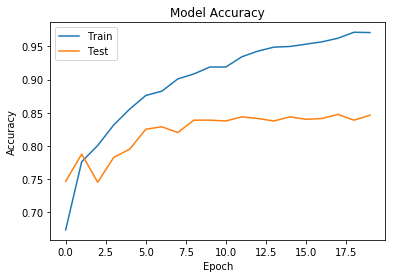

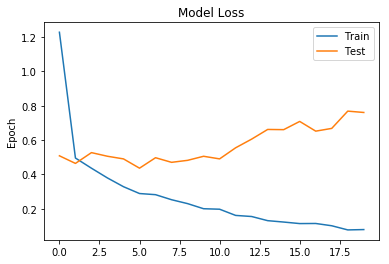

In [163]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

## Re-Train top-layer of VGG16

**CAUTION**: original tutorial code does not work: https://github.com/keras-team/keras/issues/4040

In [172]:
from keras.layers import Input
input_tensor = Input(shape=(150,150,3)) # need to define input, otherwise VGG16 dimensions are None
model_vgg16_notop = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [173]:
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=train_data.shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

In [174]:
# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights('bottleneck_fc_model.h5')

In [189]:
model_finetune = Sequential()

for layer in model_vgg16_notop.layers:
    model_finetune.add(layer)

for layer in top_model.layers:
    model_finetune.add(layer)

# model_finetune.add(top_model)

In [190]:
# add the model on top of the convolutional base
# DOES NOT WORK
# model_vgg16_notop.add(top_model)

# set the first 15 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model_finetune.layers[:15]:
    layer.trainable = False

In [178]:
type(model_vgg16_notop)

keras.engine.training.Model

In [191]:
for i, l in enumerate(model_finetune.layers):
    print(i, l, l.trainable)

0 <keras.layers.convolutional.Conv2D object at 0x7f22b3601048> False
1 <keras.layers.convolutional.Conv2D object at 0x7f22b3601908> False
2 <keras.layers.pooling.MaxPooling2D object at 0x7f22b36058d0> False
3 <keras.layers.convolutional.Conv2D object at 0x7f22b3605da0> False
4 <keras.layers.convolutional.Conv2D object at 0x7f22b360bb70> False
5 <keras.layers.pooling.MaxPooling2D object at 0x7f22b3618668> False
6 <keras.layers.convolutional.Conv2D object at 0x7f22b3618278> False
7 <keras.layers.convolutional.Conv2D object at 0x7f22b35a4358> False
8 <keras.layers.convolutional.Conv2D object at 0x7f22b35400f0> False
9 <keras.layers.pooling.MaxPooling2D object at 0x7f22b355c588> False
10 <keras.layers.convolutional.Conv2D object at 0x7f22b35781d0> False
11 <keras.layers.convolutional.Conv2D object at 0x7f22b351b358> False
12 <keras.layers.convolutional.Conv2D object at 0x7f22b35370f0> False
13 <keras.layers.pooling.MaxPooling2D object at 0x7f22b34d3588> False
14 <keras.layers.convolutional

In [192]:
model_finetune.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       295168    
__________

In [193]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model_finetune.compile(loss='binary_crossentropy',
                       optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9),
                       metrics=['accuracy'])

In [198]:
batch_size = 16
epochs = 36
img_width, img_height = 150, 150
train_data_dir = '../data/train'
validation_data_dir = '../data/validation'
nb_train_samples = 2000
nb_validation_samples = 800

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

# fine-tune the model
start_time = time.time()
history2 = model_finetune.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)
print("--- took %d:%.2d minutes ---" % divmod(time.time() - start_time, 60))

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/36
125/125 [==============================] - 756s 6s/step - loss: 0.1731 - acc: 0.9380 - val_loss: 0.2257 - val_acc: 0.9250
Epoch 2/36
125/125 [==============================] - 759s 6s/step - loss: 0.1392 - acc: 0.9430 - val_loss: 0.2494 - val_acc: 0.9175
Epoch 3/36
125/125 [==============================] - 740s 6s/step - loss: 0.1288 - acc: 0.9500 - val_loss: 0.2614 - val_acc: 0.9175
Epoch 4/36
125/125 [==============================] - 725s 6s/step - loss: 0.1414 - acc: 0.9405 - val_loss: 0.2705 - val_acc: 0.9100
Epoch 5/36
125/125 [==============================] - 724s 6s/step - loss: 0.1204 - acc: 0.9490 - val_loss: 0.2422 - val_acc: 0.9237
Epoch 6/36
125/125 [==============================] - 724s 6s/step - loss: 0.0961 - acc: 0.9585 - val_loss: 0.2618 - val_acc: 0.9300
Epoch 7/36
125/125 [==============================] - 724s 6s/step - loss: 0.0973 - acc: 0.9625 - val_loss: 0.2978 - va

In [217]:
model_finetune.save_weights('finetune_model.h5')

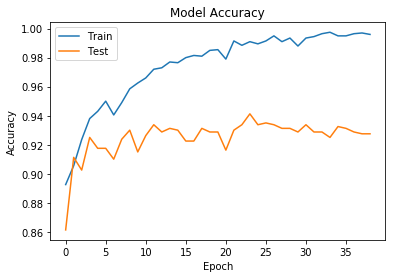

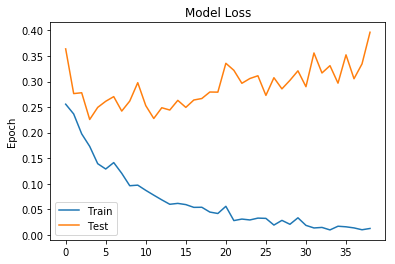

In [216]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()